# 0061_practice_houseprices

After studying my previous notebook `#006_fastai_tabular_tricks`, this notebook is about my another practice of 'Houseprice' prediction.

- Kaggle competition: House Prices - Advanced Regression Techniques
    - Join the competition & download data: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 

In [93]:
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
import warnings
warnings.filterwarnings('ignore')

In [94]:
path = Path("/Users/applewang/Desktop/Study_Materials_2023_2025/fastai_course/my-practice/house-prices-advanced-regression-techniques")
Path.BASE_PATH = path
path.ls()

(#4) [Path('test.csv'),Path('data_description.txt'),Path('train.csv'),Path('sample_submission.csv')]

In [95]:
train_df = pd.read_csv(path/'train.csv', low_memory=False)
df = train_df.copy()
df.head(3)

Id  MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition  \
0   1          60       RL         65.0  ...    2008       WD        Normal   
1   2          20       RL         80.0  ...    2007       WD        Normal   
2   3          60       RL         68.0  ...    2008       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  

[3 rows x 81 columns]

## Process 

In [96]:
#check all features how many missing values - drop/fillna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#MoSold, YrSold change type to float64, otherwise will be labeled as categorical features
df['MoSold'] = df['MoSold'].astype('float64')
df['YrSold'] = df['YrSold'].astype('float64')

In [6]:
#Some features need to fill missing values
features = list(df.columns)
for i in features:
    if df[i].isnull().sum() >0:
        if df[i].dtype == 'object': df[i] = df[i].fillna('None') #features may have such conditions instead of missing records
        else: df[i] = df[i].fillna(df[i].median())

In [8]:
#process the y-target
dep_var = 'SalePrice'
df[dep_var] = np.log1p(df[dep_var])

In [9]:
splitter = RandomSplitter(0.3, seed=30)(df)
train_idx = splitter[0]
valid_idx = splitter[1]
splits = (list(train_idx),list(valid_idx))
cont, cat = cont_cat_split(df, dep_var=dep_var)

In [11]:
cont

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
cat

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'SaleType',
 'SaleCondition']

In [10]:
#procs=[FillMissing, Categorify, Normalize]
procs=[Categorify, Normalize]
to = TabularPandas(df, procs=procs, cat_names=cat, cont_names=cont, y_names=dep_var, splits=splits)

In [11]:
len(to.train), len(to.valid)

(1022, 438)

In [12]:
to.show(2)

In [13]:
xs,y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

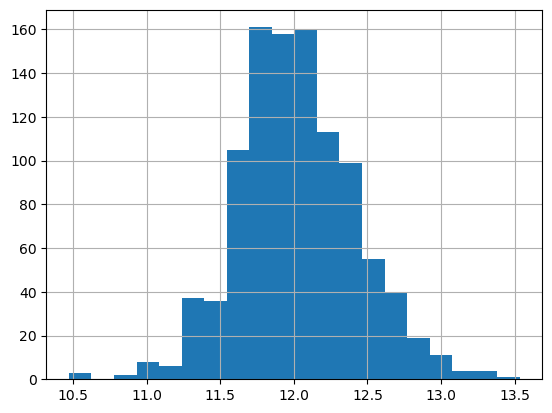

In [14]:
y.hist(bins=20);

In [15]:
np.expm1(y[:2]) #np.log1pÈÄÜÊìç‰ΩúÔºåÂæóÂá∫ÂéüÂßãsaleprice

997    185000.015625
973    182000.062500
Name: SalePrice, dtype: float32

## Model 1 - Decision Tree

In [16]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [17]:
m = DecisionTreeRegressor(max_leaf_nodes=5)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=5)

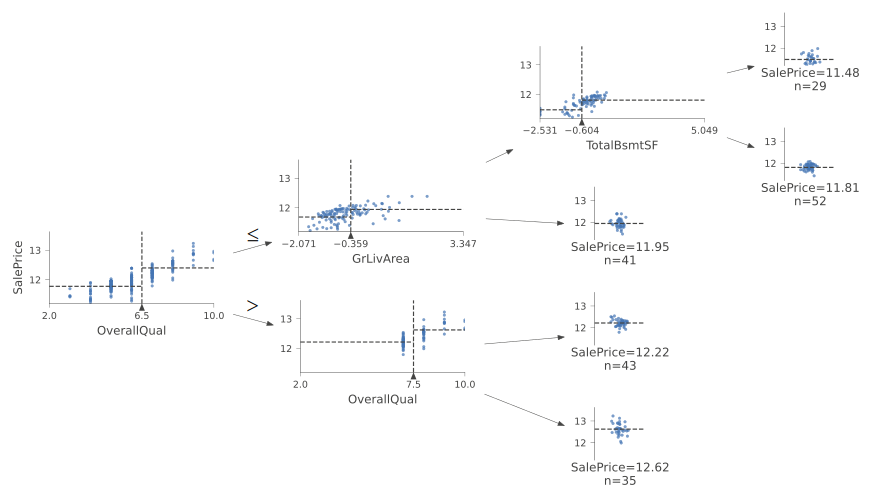

In [18]:
samp_idx = np.random.permutation(len(y))[:200]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

### Baseline rMSE

In [19]:
m = DecisionTreeRegressor(max_depth=3)
m.fit(xs, y)
m_rmse(m,xs,y), m_rmse(m, valid_xs, valid_y)

(0.209353, 0.228209)

In [20]:
m.get_n_leaves()

8

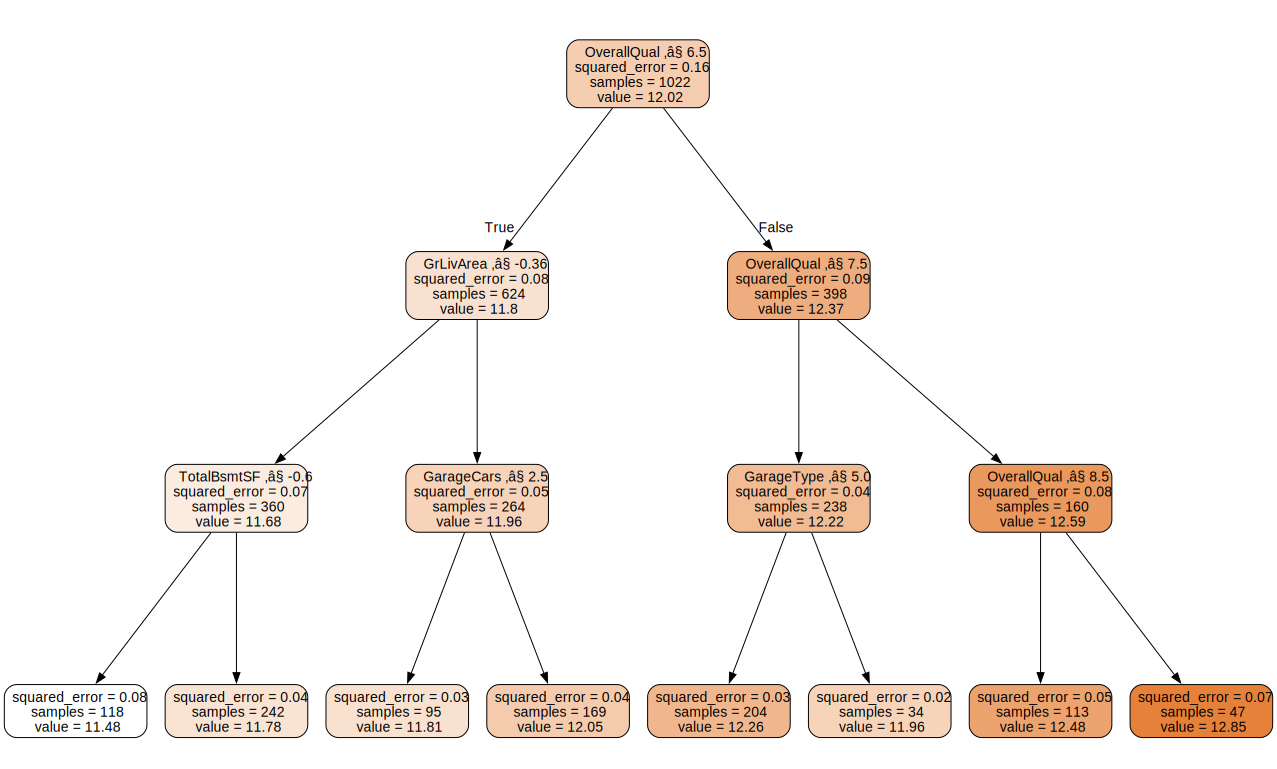

In [21]:
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=0, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))
draw_tree(m, xs, size=20,leaves_parallel=True, precision=2)

## Model 2 - Random forest

In [22]:
def rf(xs, y, n_estimators=50, max_samples=1000,max_depth=16, 
       min_samples_leaf=25, max_features=0.5, **kwargs):
    return RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, 
                                 max_samples=max_samples, 
                                 min_samples_leaf=min_samples_leaf,max_depth=max_depth,
                                max_features=max_features,oob_score=True).fit(xs,y)

In [23]:
m2 = rf(xs, y)
m_rmse(m2, xs, y), m_rmse(m2, valid_xs, valid_y)

(0.151682, 0.165602)

In [24]:
r_mse(m2.oob_prediction_,y)

0.171491

Improving with a bit overfitting. -> Check the tree variances whether in wide range. (should not)

In [25]:
preds = np.stack([t.predict(valid_xs) for t in m2.estimators_])
preds.std(0)[:6]

array([0.1261692 , 0.15934388, 0.1351819 , 0.11430164, 0.19329701,
       0.05481956])

### Feature importance

In [26]:
def rf_feat_importance(df, m):
    return pd.DataFrame({'col':df.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False)
rf_feat_importance(xs, m2)

col       imp
14   OverallQual  0.408032
70     GrLivArea  0.140460
60     YearBuilt  0.110545
46    GarageCars  0.051022
66   TotalBsmtSF  0.039680
..           ...       ...
41    Functional  0.000000
17      RoofMatl  0.000000
16     RoofStyle  0.000000
38  KitchenAbvGr  0.000000
55      SaleType  0.000000

[80 rows x 2 columns]

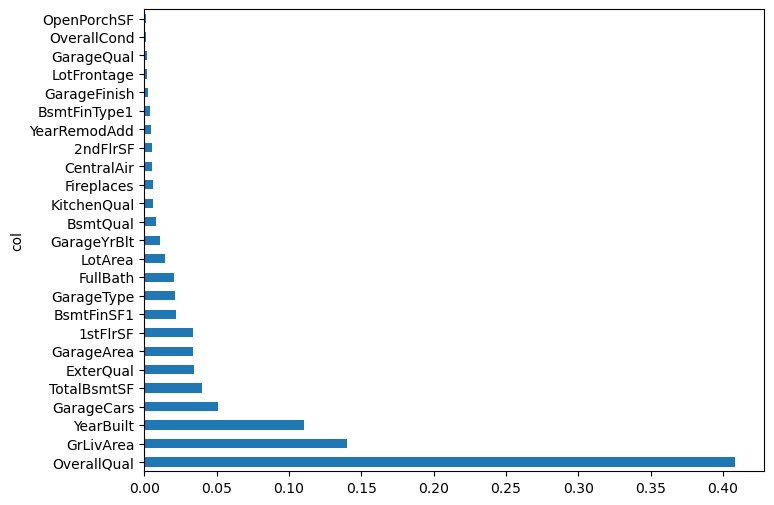

In [27]:
def plot_fi(fi):
    return fi.plot('col','imp','barh', figsize=(8,6), legend=False)
plot_fi(rf_feat_importance(xs, m2)[:25]);

#### Remove low importance features (worse)

In [28]:
fi = rf_feat_importance(xs, m2)
to_keep = fi[fi.imp>0.01]
len(to_keep)

13

In [29]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [30]:
m2_1 = rf(xs_imp,y)

In [31]:
m_rmse(m2_1, xs_imp,y), m_rmse(m2_1, valid_xs_imp, valid_y)

(0.403183, 0.390133)

After removing low important features, rMSE surprisely increases! Due to the training set is quite small, some features may have very low imp score but relating to other important features I guess. So removal of low importance features is not a good solution here.

### Find relationships of features

In [32]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(8,6), font_size=8):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

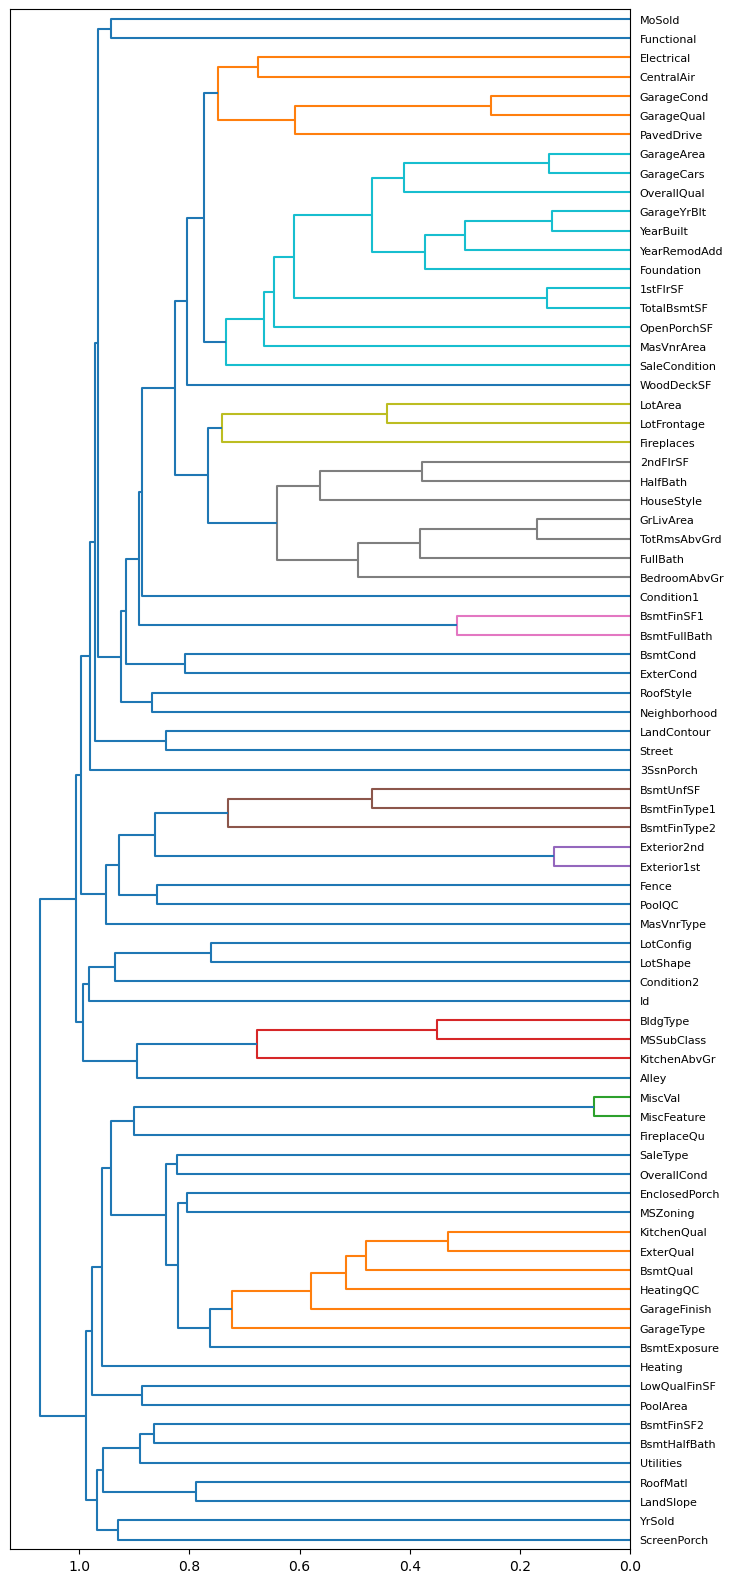

In [33]:
cluster_columns(xs, figsize=(8,20))

In [34]:
def get_oob(xs):
    m = rf(xs,y)
    return round(m.oob_score_,6)

In [35]:
get_oob(xs)

0.820149

In [51]:
{c: get_oob(xs.drop(c, axis=1)) for c in xs.columns}

{'MSSubClass': 0.816671,
 'MSZoning': 0.813455,
 'Street': 0.81888,
 'LotShape': 0.81744,
 'LandContour': 0.820252,
 'Utilities': 0.821844,
 'LotConfig': 0.821375,
 'LandSlope': 0.818227,
 'Neighborhood': 0.821829,
 'Condition1': 0.822295,
 'Condition2': 0.817621,
 'BldgType': 0.820953,
 'HouseStyle': 0.824426,
 'OverallQual': 0.804225,
 'OverallCond': 0.819827,
 'RoofStyle': 0.821052,
 'RoofMatl': 0.819011,
 'Exterior1st': 0.820851,
 'Exterior2nd': 0.823235,
 'ExterQual': 0.821927,
 'ExterCond': 0.818552,
 'Foundation': 0.826439,
 'BsmtQual': 0.828718,
 'BsmtCond': 0.819063,
 'BsmtExposure': 0.824165,
 'BsmtFinType1': 0.821952,
 'BsmtFinType2': 0.820139,
 'Heating': 0.822604,
 'HeatingQC': 0.818669,
 'CentralAir': 0.818888,
 'Electrical': 0.823042,
 'BsmtFullBath': 0.822197,
 'BsmtHalfBath': 0.822141,
 'FullBath': 0.820608,
 'HalfBath': 0.825748,
 'BedroomAbvGr': 0.819318,
 'KitchenAbvGr': 0.817542,
 'KitchenQual': 0.82092,
 'TotRmsAbvGrd': 0.821208,
 'Functional': 0.820386,
 'Firepla

In [36]:
to_drop=['Id', 'Exterior1st', 'BsmtFinType1', 'CentralAir','Fireplaces','GarageYrBlt']
xs_imp = xs.drop(to_drop, axis=1)
get_oob(xs_imp)

0.82125

In [37]:
valid_xs_imp=valid_xs.drop(to_drop, axis=1)
m2_2 = rf(xs_imp,y)
m_rmse(m2_2,xs_imp,y), m_rmse(m2_2, valid_xs_imp, valid_y)

(0.150993, 0.167264)

A bit worse as well...üòÖ try less to drop?

In [38]:
to_drop=['Id']
xs_imp = xs.drop(to_drop, axis=1)
get_oob(xs_imp)

0.82155

In [39]:
valid_xs_imp=valid_xs.drop(to_drop, axis=1)
m2_3 = rf(xs_imp,y)
m_rmse(m2_3,xs_imp,y), m_rmse(m2_3, valid_xs_imp, valid_y)

(0.151297, 0.166289)

A little better. It shows that those features are quite useful with specific information instead of getting rid of. 

How about the performance of boosting models, or Neural networks?

## Model 3 - Boosting

### sklearn - GradientBoostingRegressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
m3 = GradientBoostingRegressor().fit(xs_imp,y)

In [42]:
m_rmse(m3, xs_imp, y), m_rmse(m3, valid_xs_imp, valid_y)

(0.076222, 0.125253)

Quite better than all models above üëçüëçüëç

### Xgboost

In [43]:
import xgboost

In [44]:
m3_1 = xgboost.XGBRegressor(n_estimators=300, max_depth=2, learning_rate=0.1).fit(xs_imp,y)

In [45]:
m_rmse(m3_1, xs_imp, y), m_rmse(m3_1, valid_xs_imp, valid_y)

(0.079792, 0.121902)

It improves a lot comparing with RF.

In [46]:
m3_2 = xgboost.XGBRFRegressor().fit(xs_imp,y)

In [47]:
m_rmse(m3_2, xs_imp, y), m_rmse(m3_2, valid_xs_imp, valid_y)

(0.095416, 0.148934)

XGBRF is a little worse than XGB here. This also shows that the features with low importance but they are non-linear with inter-relationships.

### LightGBM

In [48]:
import lightgbm

In [49]:
m3_3 = lightgbm.LGBMRegressor(max_depth=2, n_estimators=300).fit(xs_imp,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3045
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 71
[LightGBM] [Info] Start training from score 12.022300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [50]:
m_rmse(m3_3, xs_imp, y), m_rmse(m3_3, valid_xs_imp, valid_y)

(0.086641, 0.13028)

### Lasso regression

In [51]:
from sklearn.linear_model import LassoCV

In [52]:
m3_4 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(xs_imp,y)

In [53]:
m_rmse(m3_4, xs_imp, y), m_rmse(m3_4, valid_xs_imp, valid_y)

(0.124976, 0.176014)

So far, **XGB is the best model** (lowest rMSE of train 0.079 /valid 0.119) with a bit overfitting. 

## Nerual networks

In [68]:
y.min(), y.max()

(10.471978, 13.534474)

In [69]:
df_nn = df.copy()
procs_nn = [FillMissing, Categorify, Normalize]
cont_nn, cat_nn = cont_cat_split(df_nn, dep_var=dep_var)
to_nn = TabularPandas(df_nn, procs_nn, cat_nn, cont_nn, y_names=dep_var, splits=splits)

In [70]:
df_nn.head(2)

Id  MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition  \
0   1          60       RL         65.0  ...  2008.0       WD        Normal   
1   2          20       RL         80.0  ...  2007.0       WD        Normal   

   SalePrice  
0  12.247699  
1  12.109016  

[2 rows x 81 columns]

In [71]:
dls = to_nn.dataloaders(bs=32)

In [72]:
learn = tabular_learner(dls, y_range=(10, 14), layers=[300,100], n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0010000000474974513)

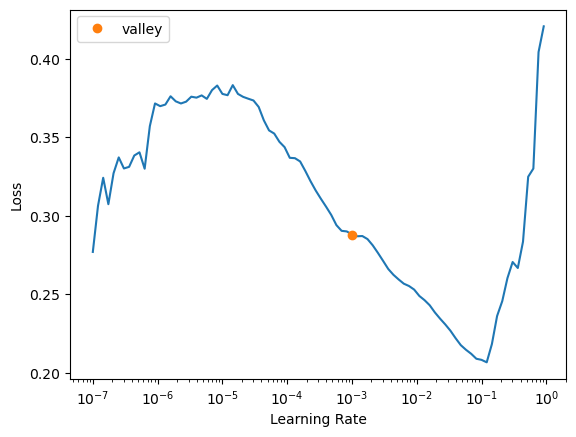

In [73]:
learn.lr_find()

In [74]:
learn.fit_one_cycle(5, 1e-3)

In [75]:
preds, targs = learn.get_preds()
r_mse(preds, targs)

0.242325

## Ensemble XGBoost & NN

In [76]:
pred_xgboost = m3_1.predict(valid_xs_imp)

In [77]:
pred_nn = to_np(preds.squeeze())

In [78]:
pred_en = (0.8*pred_xgboost + 0.2*pred_nn)

In [79]:
r_mse(pred_en, valid_y)

0.126053

## Submission - Test data

In [80]:
test_df = pd.read_csv(path/'test.csv', low_memory=False)
tdf = test_df.copy()
tdf.head(2)

Id  MSSubClass MSZoning  LotFrontage  ...  MoSold YrSold SaleType  \
0  1461          20       RH         80.0  ...       6   2010       WD   
1  1462          20       RL         81.0  ...       6   2010       WD   

  SaleCondition  
0        Normal  
1        Normal  

[2 rows x 80 columns]

### Process - Test data

In [81]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [82]:
tdf['MoSold'] = tdf['MoSold'].astype('float64')
tdf['YrSold'] = tdf['YrSold'].astype('float64')
#to_drop = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',  'MiscFeature']
#tdf = tdf.drop(to_drop, axis=1)
tfeatures = list(tdf.columns)
for i in tfeatures:
    if tdf[i].isnull().sum() >0:
        if tdf[i].dtype == 'object': tdf[i] = tdf[i].fillna('None') #fill modes may inaccurate
        else: tdf[i] = tdf[i].fillna(df[i].median()) #use train's median

In [105]:
#cont_t, cat_t = cont_cat_split(tdf, dep_var=None)

In [83]:
tto = to.new(tdf)

In [84]:
tto.process()
txs = tto.items
txs = txs.drop(['Id'], axis=1)
txs = txs[xs_imp.columns]
txs.head(2)

MSSubClass  MSZoning  Street  Alley  ...  ScreenPorch    MiscVal    MoSold  \
0           1         3       2      2  ...     1.847983  -0.082599 -0.152881   
1           1         4       2      2  ...    -0.273845  24.262283 -0.152881   

     YrSold  
0  1.614682  
1  1.614682  

[2 rows x 79 columns]

### Predictions

In [85]:
preds_xgb = m3_1.predict(txs)

In [86]:
tdl = learn.dls.test_dl(tdf)

p,_ = learn.get_preds(dl=tdl)
preds_nn = to_np(p.squeeze())

In [87]:
len(preds_nn)

1459

In [88]:
preds_log = (0.8*preds_xgb + 0.2*preds_nn)
preds_final = np.expm1(preds_log)
preds_final

array([125539.914, 110971.72 , 186819.27 , ..., 171021.44 , 109842.04 ,
       216741.78 ], dtype=float32)

In [89]:
preds_df = pd.DataFrame(preds_final, columns=['SalePrice'])

In [90]:
preds_df['Id'] = test_df['Id']

In [91]:
submission = preds_df[['Id', 'SalePrice']]
submission

Id      SalePrice
0     1461  125539.914062
1     1462  110971.718750
2     1463  186819.265625
3     1464  188380.953125
4     1465  189339.687500
...    ...            ...
1454  2915   81553.109375
1455  2916   81302.273438
1456  2917  171021.437500
1457  2918  109842.039062
1458  2919  216741.781250

[1459 rows x 2 columns]

In [92]:
submission.to_csv('houseprice_sub1.csv', index=False)

'houseprice_sub1.csv' - kaggle 0.14222

In [ ]:
from fastkaggle import *

push_notebook('apple9855wang', 'House-Price-Predictions-practice-1',
             title='House-Price-Predictions-practice-1',
             file='0061_practice_houseprices.ipynb',
             competition='house-prices-advanced-regression-techniques'
             )